EX1: Viết hàm có tên là show_stars(rows). Nếu rows là 5, nó sẽ hiện như sau:
o *
o **
o ***
o ****
o *****

In [29]:
def show_stars(rows):
    for i in range(rows):
        print('*'*(i+1))

In [28]:
show_stars(7)

*
**
***
****
*****
******
*******


Ex 2:
Giả sử bạn đang đứng ở tầng trệt (tầng 0) ở tòa nhà 100 tầng. Bạn có 1 con xúc sắc 6 mặt. 
Bạn được đặt cược rằng nếu bạn đi được lên tầng 60 trở lên là bạn thắng. Cách đi như sau:
Nếu tung xúc sắc lên:
- Nếu mặt trên cho ra số chấm tròn là 1 hoặc 2 thì bạn đi xuống 1 tầng.
- Nếu mặt trên cho ra số chấm tròn từ 3 đến 5 thì bạn đi lên 1 tầng.
- Nếu mặt trên cho ra số chấm tròn là 6 thì bạn sẽ được tung xúc sắc lại 1 lần nữa, ra bao nhiêu 
số chấm tròn thì đi lên bấy nhiêu tầng cho lần đi đó.
Bạn được đi lên 100 lần.
Chú ý:
- Vì 1 lý do gì đó, bạn có khả năng phải đi xuống tầng trệt để đi lại. Khả năng này 0.1%.
- Không có tầng âm, nghĩa là nếu rơi vào số chấm tròn là 1 hoặc 2 mà bạn đang ở tầng 
trệt rồi thì bạn sẽ được ở tầng trệt cho lần đi đó.
- Giả định thêm: Xúc sắc bình thường. Bạn được chơi game này bao nhiêu lần tùy điều 
kiện của bạn.
Tính xác suất thắng cuộc là bao nhiêu?

Ex3:
Lấy dữ liệu trong file Names.zip đính kèm
- Dùng Pandas đọc và tổng hợp dữ liệu của các năm
- Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)
- Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính
- Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn
- Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính (thể hiện 
bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)
- Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam và nữ qua 
các năm 1900, 1960 và 2018
- Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ
“Lesl…” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại

In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
filelist = []
for i in range (1880, 2019):
    x = f'yob{i}.txt'
    filelist.append(x)
    filelist.append(i)
filelist

['yob1880.txt',
 1880,
 'yob1881.txt',
 1881,
 'yob1882.txt',
 1882,
 'yob1883.txt',
 1883,
 'yob1884.txt',
 1884,
 'yob1885.txt',
 1885,
 'yob1886.txt',
 1886,
 'yob1887.txt',
 1887,
 'yob1888.txt',
 1888,
 'yob1889.txt',
 1889,
 'yob1890.txt',
 1890,
 'yob1891.txt',
 1891,
 'yob1892.txt',
 1892,
 'yob1893.txt',
 1893,
 'yob1894.txt',
 1894,
 'yob1895.txt',
 1895,
 'yob1896.txt',
 1896,
 'yob1897.txt',
 1897,
 'yob1898.txt',
 1898,
 'yob1899.txt',
 1899,
 'yob1900.txt',
 1900,
 'yob1901.txt',
 1901,
 'yob1902.txt',
 1902,
 'yob1903.txt',
 1903,
 'yob1904.txt',
 1904,
 'yob1905.txt',
 1905,
 'yob1906.txt',
 1906,
 'yob1907.txt',
 1907,
 'yob1908.txt',
 1908,
 'yob1909.txt',
 1909,
 'yob1910.txt',
 1910,
 'yob1911.txt',
 1911,
 'yob1912.txt',
 1912,
 'yob1913.txt',
 1913,
 'yob1914.txt',
 1914,
 'yob1915.txt',
 1915,
 'yob1916.txt',
 1916,
 'yob1917.txt',
 1917,
 'yob1918.txt',
 1918,
 'yob1919.txt',
 1919,
 'yob1920.txt',
 1920,
 'yob1921.txt',
 1921,
 'yob1922.txt',
 1922,
 'yob1923.t

In [25]:
df = pd.DataFrame()

for j in filelist:
    if filelist.index(j) % 2 == 0: 
        frame = pd.read_csv(j, header = None)
        frame['Year'] = filelist[filelist.index(j )+1]
        df = df.append(frame)  #ignore_index = True)
    else:
        continue
df.columns = ['Name', 'Sex', 'Total case', 'Year']
df

,Name,Sex,Total case,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018


In [30]:
df.head(10)

,Name,Sex,Total case,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)

<AxesSubplot:xlabel='Year', ylabel='Total case'>

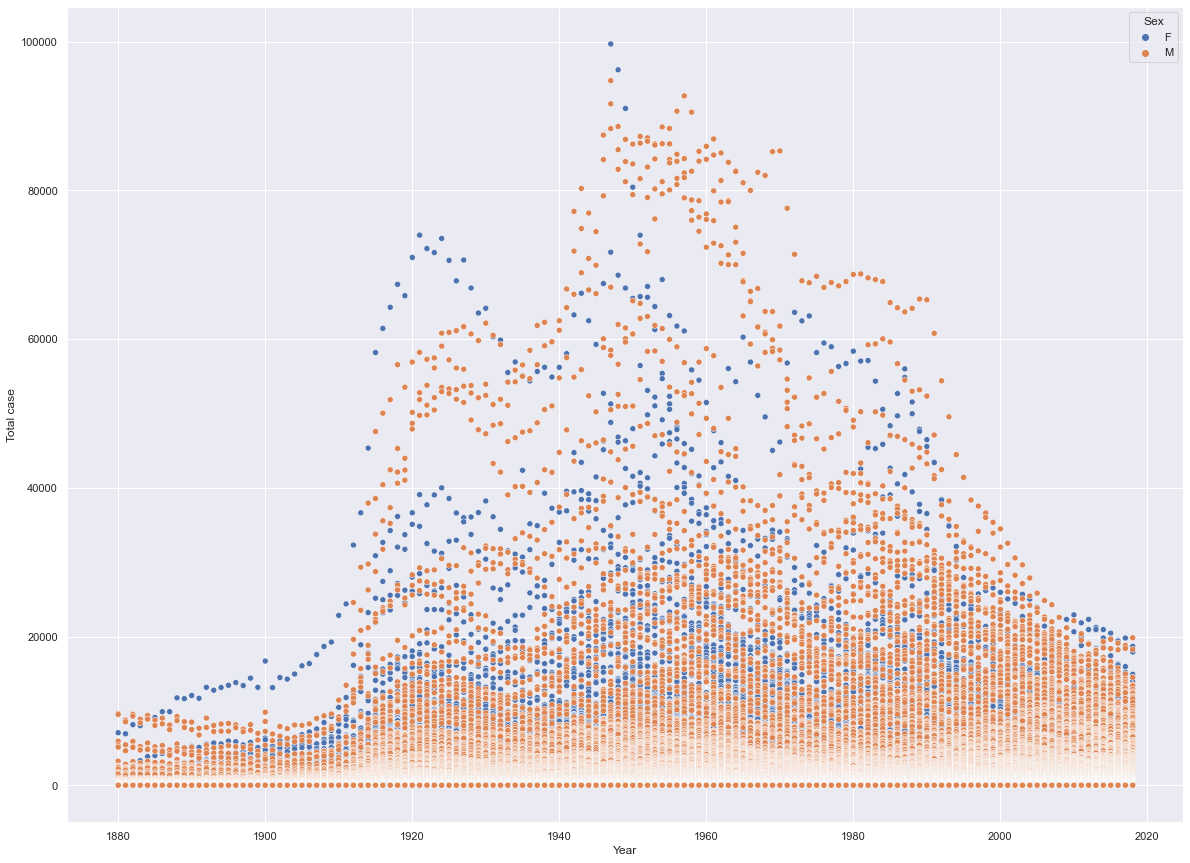

In [34]:
sns.set(rc={'figure.figsize':(20,15)})
sns.scatterplot(data= df, x = 'Year', y = 'Total case', hue = 'Sex')   

Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính

In [36]:
df.columns = ['Name', 'Sex', 'Total_case', 'Year']

In [41]:
df_F = df[df['Sex'] == 'F'].sort_values(by =['Year', 'Total_case'], ascending = [True, False]).iloc[:1000]

In [42]:
df_M = df[df['Sex'] == 'M'].sort_values(by =['Year', 'Total_case'], ascending = [True, False]).iloc[:1000]

In [43]:
df_S  = df_F.append(df_M)

In [45]:
df_S.tail(10)

,Name,Sex,Total_case,Year
1932,Judd,M,5,1880
1933,Julious,M,5,1880
1934,Justice,M,5,1880
1935,Katherine,M,5,1880
1936,Kelly,M,5,1880
1937,Kit,M,5,1880
1938,Knute,M,5,1880
1939,Lavern,M,5,1880
1940,Lawyer,M,5,1880
1941,Layton,M,5,1880


Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn

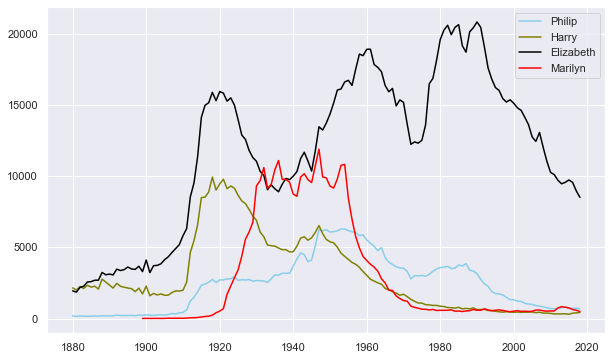

In [114]:
plt.figure(figsize = (10,6))

List_name = ['Philip', 'Harry', 'Elizabeth', 'Marilyn']

plot1 =  pd.DataFrame({'x_values' : df[df['Name'] == List_name[0]].groupby('Year').Total_case.sum().index, 'y_values' : df[df['Name'] == List_name[0]].groupby('Year').Total_case.sum().values})
plot2 =  pd.DataFrame({'x_values' : df[df['Name'] == List_name[1]].groupby('Year').Total_case.sum().index, 'y_values' : df[df['Name'] == List_name[1]].groupby('Year').Total_case.sum().values})
plot3 =  pd.DataFrame({'x_values' : df[df['Name'] == List_name[2]].groupby('Year').Total_case.sum().index, 'y_values' : df[df['Name'] == List_name[2]].groupby('Year').Total_case.sum().values})
plot4 =  pd.DataFrame({'x_values' : df[df['Name'] == List_name[3]].groupby('Year').Total_case.sum().index, 'y_values' : df[df['Name'] == List_name[3]].groupby('Year').Total_case.sum().values})
            
                                       
plt.plot('x_values','y_values', data = plot1, marker = '',  color = 'skyblue', label = List_name [0])
plt.plot('x_values','y_values', data = plot2 , marker = '', color =  'olive', label = List_name[1])
plt.plot('x_values','y_values', data = plot3, marker = '', color = 'black', label = List_name[2])
plt.plot('x_values','y_values', data = plot4, marker = '', color = 'red', label = List_name[3])

plt.legend()
plt.show()

Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính (thể hiện bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)

In [118]:
df_F = df[df['Sex'] == 'F'].sort_values(by =['Year', 'Total_case'], ascending = [True, False]).iloc[:1000]

,Name,Sex,Total_case,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
53,Marie,F,499,1881
54,Nora,F,498,1881
55,Effie,F,463,1881
56,Blanche,F,456,1881


In [143]:
df_sum= df.groupby('Year', as_index = False).sum()

In [144]:
df_sum

,Year,Total_case
0,1880,201484
1,1881,192696
2,1882,221533
3,1883,216944
4,1884,243461
...,...,...
134,2014,3698914
135,2015,3691990
136,2016,3657797
137,2017,3561975


In [147]:
df =pd.merge (df, df_sum, on = 'Year', how = 'left' )

In [151]:
df['Rate'] = df['Total_case_x'] / df['Total_case_y'] * 100

In [152]:
df

,Name,Sex,Total_case_x,Year,Total_case_y,Rate
0,Mary,F,7065,1880,201484,3.506482
1,Anna,F,2604,1880,201484,1.292410
2,Emma,F,2003,1880,201484,0.994124
3,Elizabeth,F,1939,1880,201484,0.962359
4,Minnie,F,1746,1880,201484,0.866570
...,...,...,...,...,...,...
1957041,Zylas,M,5,2018,3487353,0.000143
1957042,Zyran,M,5,2018,3487353,0.000143
1957043,Zyrie,M,5,2018,3487353,0.000143
1957044,Zyron,M,5,2018,3487353,0.000143


In [162]:
df[df['Name'].isin (df_F['Name'])].groupby('Year', as_index = False).Rate.sum().sort_values(by = 'Rate' , ascending = False)
df[df['Name'].isin (df_M['Name'])].groupby('Year', as_index = False).Rate.sum().sort_values(by = 'Rate' , ascending = False)

,Year,Rate
0,1880,72.075698
1,1881,70.065284
2,1882,69.302090
3,1883,67.270355
4,1884,66.345739
...,...,...
134,2014,29.089971
135,2015,28.994607
136,2016,28.760125
137,2017,28.419627


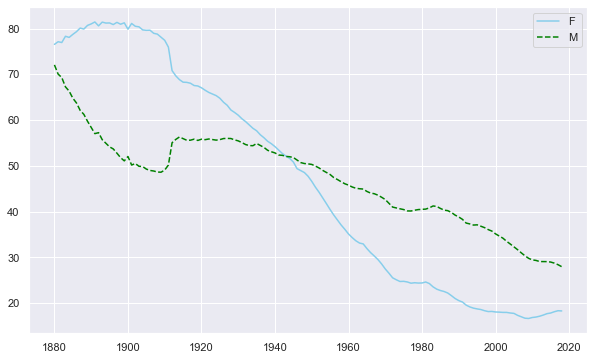

In [172]:
plt.figure(figsize = (10,6))

plot1 = df[df['Name'].isin (df_F['Name'])].groupby('Year', as_index = False).Rate.sum()#.sort_values(by = 'Rate' , ascending = False)
plot2 = df[df['Name'].isin (df_M['Name'])].groupby('Year', as_index = False).Rate.sum()#.sort_values(by = 'Rate' , ascending = False)    
                                       
plt.plot('Year', 'Rate', data = plot1, marker = '',  color = 'skyblue', label = 'F')
plt.plot('Year', 'Rate', data = plot2, marker = '',linestyle = 'dashed',  color = 'green', label = 'M') 

plt.legend()
plt.show()

Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam và nữ qua các năm 1900, 1960 và 2018

In [173]:
df.head(10)

,Name,Sex,Total_case_x,Year,Total_case_y,Rate
0,Mary,F,7065,1880,201484,3.506482
1,Anna,F,2604,1880,201484,1.292410
2,Emma,F,2003,1880,201484,0.994124
3,Elizabeth,F,1939,1880,201484,0.962359
4,Minnie,F,1746,1880,201484,0.866570
5,Margaret,F,1578,1880,201484,0.783189
6,Ida,F,1472,1880,201484,0.730579
7,Alice,F,1414,1880,201484,0.701793
8,Bertha,F,1320,1880,201484,0.655139
9,Sarah,F,1288,1880,201484,0.639257


In [174]:
df['Letter'] = df['Name'].str[0]

In [175]:
df

,Name,Sex,Total_case_x,Year,Total_case_y,Rate,Letter
0,Mary,F,7065,1880,201484,3.506482,M
1,Anna,F,2604,1880,201484,1.292410,A
2,Emma,F,2003,1880,201484,0.994124,E
3,Elizabeth,F,1939,1880,201484,0.962359,E
4,Minnie,F,1746,1880,201484,0.866570,M
...,...,...,...,...,...,...,...
1957041,Zylas,M,5,2018,3487353,0.000143,Z
1957042,Zyran,M,5,2018,3487353,0.000143,Z
1957043,Zyrie,M,5,2018,3487353,0.000143,Z
1957044,Zyron,M,5,2018,3487353,0.000143,Z


In [184]:
df[df['Year'].isin([1900, 1960,2018])].groupby('Year', as_index = False).Letter.nunique()

,Year,Letter
0,1900,25
1,1960,26
2,2018,26


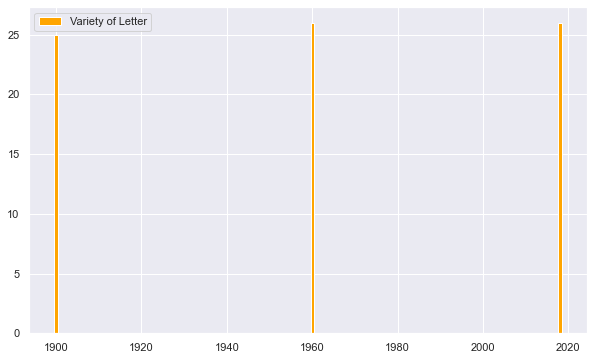

In [183]:
plt.figure(figsize = (10,6))
barWidth = 5
plt.bar(df[df['Year'].isin([1900, 1960,2018])].groupby('Year').Letter.nunique().index, df[df['Year'].isin([1900, 1960,2018])].groupby('Year').Letter.nunique().values, color = 'orange', label = 'Variety of Letter')

plt.legend()
plt.show()

Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ “Lesl…” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại

In [200]:
df['3_letter'] = df['Name'].str[:3]

In [199]:
del df['4_letter']

In [208]:
df_letter = df.groupby(['3_letter','Year',  'Sex'], as_index = False).Total_case_x.sum().sort_values(by = ['3_letter', 'Sex', 'Year', 'Total_case_x'])

In [209]:
df

,3_letter,Year,Sex,Total_case_x
2,Aab,2008,F,5
5,Aab,2011,F,7
7,Aab,2012,F,5
10,Aab,2014,F,14
12,Aab,2015,F,12
...,...,...,...,...
346747,Zyv,2015,M,7
346751,Zyy,2010,F,6
346752,Zyy,2014,M,6
346753,Zzy,2010,M,5


In [211]:
df_letter['3_letter'].nunique()

4296

In [214]:
df_letter.groupby(['3_letter', 'Sex']).Sex.count()

3_letter  Sex
Aab       F       8
          M      12
Aad       F      16
          M      30
Aaf       F       5
                 ..
Zyv       F       3
          M       2
Zyy       F       1
          M       1
Zzy       M       2
Name: Sex, Length: 7163, dtype: int64

plt.bar(df[df['Sex'] ==  'F'].groupby('3_letter').Total_case_x.count().index, df[df['Sex'] ==  'F'].groupby('3_letter').Total_case_x.count().values, label = 'F')
plt.bar(df[df['Sex'] ==  'M'].groupby('3_letter').Total_case_x.count().index, df[df['Sex'] ==  'M'].groupby('3_letter').Total_case_x.count().values, label = 'F')

plt.legend()
plt.show()